In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def GenerateWindows(window_size,step_size,sample_len):
    ts_init=np.arange(0,sample_len-window_size,window_step).astype(np.int)
    
    return ts_init

%matplotlib qt
    

In [2]:
#input signal
x=np.linspace(0,15000-1,15000)
y=np.sin(2*np.pi*x/20)

x1=np.linspace(5000,15000-1,10000)
x1=x1.astype(np.int)
y1=np.sin(2*np.pi*x1/150)
y[x1]=y[x1]+y1

x2=np.linspace(10000,15000-1,5000)
x2=x2.astype(np.int)
y2=np.sin(2*np.pi*x2/70)
y[x2]=y[x2]+y2

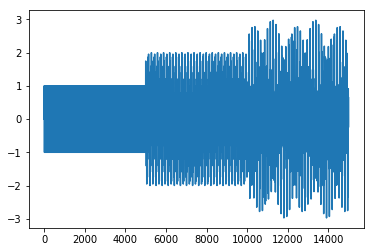

In [3]:
plt.figure('Input')
plt.plot(x,y)
plt.show()

In [4]:
#create index for generating windows
window_size=100
step_size=5
sample_len=len(x)
idx_init=np.arange(0,sample_len-window_size,step_size)
idx_end=np.arange(window_size,sample_len,step_size)


In [5]:
#chopping input signal into windows
windows=np.zeros([window_size,len(idx_end)]) #create array with size: window size-by-# of windows
windows_x=np.arange(0,window_size)
for i in range(0,len(idx_end)):
    windows[:,i]=y[idx_init[i]:idx_end[i]]

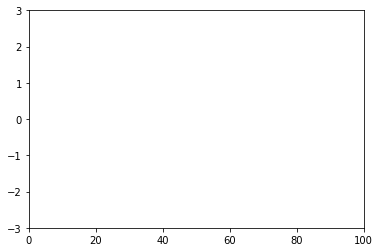

In [11]:
# Animate using code from Jake Vanderplas http://jakevdp.github.com
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, window_size), ylim=(-3, 3))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(windows_x, windows[:,i])
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(idx_end))
#                                frames=200, interval=20, blit=True)
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()

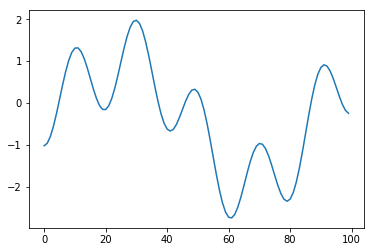

In [9]:
plt.figure()
plt.plot(windows_x, windows[:,-1])